## 类别变量的编码


本节代码包括：
-  One hot encoding
-  Ordinal numbering encoding
-  Mean encoding
-  Weight of Evidence (WoE)

本节使用的数据集是titanic幸存者预测的数据。该文件已经上传至 /data 目录。

如需自己下载，下载地址[Kaggle website](https://www.kaggle.com/c/titanic/data)。 注意请下载 train.csv，并更名为 titanic.csv 放置在 /data 目录下。

### One hot encoding

In [2]:
import pandas as pd

data = pd.read_csv('../data/titanic.csv', usecols=['Sex'])
data.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [3]:
# one hot encoding

pd.get_dummies(data).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [4]:
# 与原始变量对照
pd.concat([data, pd.get_dummies(data)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [5]:
# 做 K-1 个类别的 one hot encoding
pd.get_dummies(data, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [8]:
# 在看一个多个标签的类别变量
data=pd.read_csv('../data/titanic.csv', usecols=['Embarked'])
data.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [9]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# 注意 缺失变量不会被处理
pd.get_dummies(data, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [11]:
# one hot encoding的同时，增加一个额外变量表示缺失
pd.get_dummies(data, drop_first=True, dummy_na=True).head()

,Embarked_Q,Embarked_S,Embarked_nan
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [12]:
# 观察处理后，该变量的取值
pd.get_dummies(data, drop_first=True, dummy_na=True).sum(axis=0)

Embarked_Q       77
Embarked_S      644
Embarked_nan      2
dtype: int64

### Ordinal numbering encoding

In [14]:
import pandas as pd
import datetime

In [16]:
# 我们创建一个日期变量来演示 ordinal numbering encoiding 方法
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, 30)]
df = pd.DataFrame(date_list)
df.columns = ['day']
df.head()

,day
0,2018-07-01 14:52:41.318121
1,2018-06-30 14:52:41.318121
2,2018-06-29 14:52:41.318121
3,2018-06-28 14:52:41.318121
4,2018-06-27 14:52:41.318121


In [17]:
# 生成“星期几”变量
df['day_of_week'] = df['day'].dt.weekday_name
df.head()

,day,day_of_week
0,2018-07-01 14:52:41.318121,Sunday
1,2018-06-30 14:52:41.318121,Saturday
2,2018-06-29 14:52:41.318121,Friday
3,2018-06-28 14:52:41.318121,Thursday
4,2018-06-27 14:52:41.318121,Wednesday


In [18]:
# Ordinal numbering encoding

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(10)

,day,day_of_week,day_ordinal
0,2018-07-01 14:52:41.318121,Sunday,7
1,2018-06-30 14:52:41.318121,Saturday,6
2,2018-06-29 14:52:41.318121,Friday,5
3,2018-06-28 14:52:41.318121,Thursday,4
4,2018-06-27 14:52:41.318121,Wednesday,3
5,2018-06-26 14:52:41.318121,Tuesday,2
6,2018-06-25 14:52:41.318121,Monday,1
7,2018-06-24 14:52:41.318121,Sunday,7
8,2018-06-23 14:52:41.318121,Saturday,6
9,2018-06-22 14:52:41.318121,Friday,5


### Mean encoding

In [20]:
data=pd.read_csv('../data/titanic.csv',  usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [21]:
# 用 missing 来填充缺失值
data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [22]:
# Cabin 字段有148个标签，需要合并

len(data.Cabin.unique())

148

In [23]:
# 用 Cabin 的首字母替代原始的取值
data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [24]:
# 合并后，该变量的标签少了很多
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [25]:
# 分割训练集测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [26]:
# 计算Cabin变量 在目标变量“Survived”上的均值

X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [27]:
# 把这个均值的对应关系放在字典里
ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ordered_labels

{'A': 0.42857142857142855,
 'B': 0.77419354838709675,
 'C': 0.5714285714285714,
 'D': 0.69230769230769229,
 'E': 0.7407407407407407,
 'F': 0.66666666666666663,
 'G': 0.5,
 'M': 0.30360934182590232,
 'T': 0.0}

In [28]:
# Mean Encoding
X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


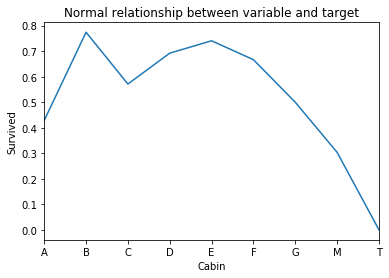

In [30]:
# 观察原始变量和目标变量的关系
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

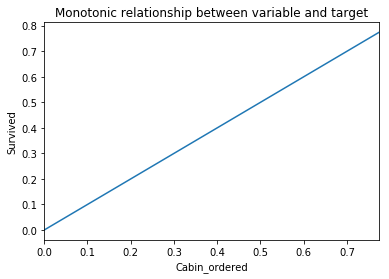

In [31]:
# 观察 mean encoding 后的变量和目标变量的关系
fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

### Weight of Evidence (WoE)

In [34]:
data = pd.read_csv('../data/titanic.csv', usecols=['Cabin', 'Survived'])
data.head()


,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [35]:
# 与之前同样的预处理
data.Cabin.fillna('Missing', inplace=True)
data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [36]:
# 分割训练集测试集
X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [37]:
# 生存的概率
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [38]:
# 死亡的概率
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [39]:
# 将 0 替换为一个极小值，方便 log的计算
prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000010,1.000000


In [41]:
# 计算 WoE
import numpy as np
prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,WoE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [43]:
# 替换原始值

ordered_labels = prob_df['WoE'].to_dict()
X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)
X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.049822
52,D,1,0.810930
386,M,0,-0.830169
124,D,0,0.810930
578,M,0,-0.830169


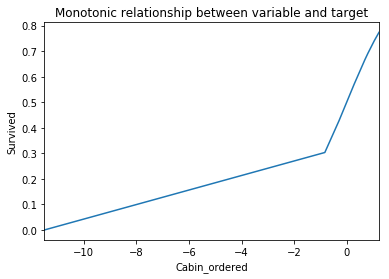

In [44]:
# WoE 后变量和目标变量的关系
fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')